In [1]:
#Importing required packages.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
wine_df = pd.read_csv("WineQT.csv")

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [30]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.088682,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.330787,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.155144,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,-0.007732,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.100601,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.070577,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.226680,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.154255,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,0.015251,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.234221,-0.103954


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


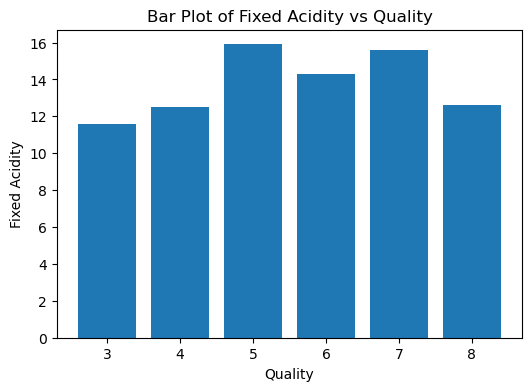

In [5]:
#See any trend in Fixed Acidity vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Bar Plot of Fixed Acidity vs Quality')
plt.show()

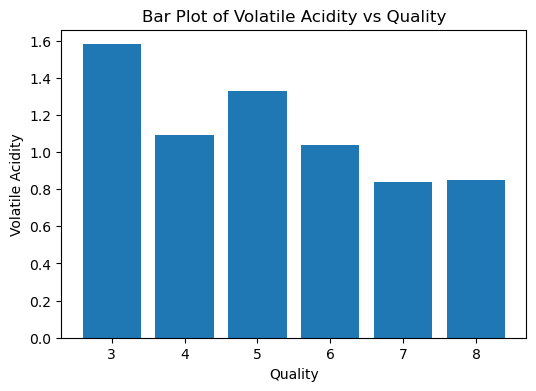

In [6]:
#See any trend in Volatile Acidity vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Bar Plot of Volatile Acidity vs Quality')
plt.show()

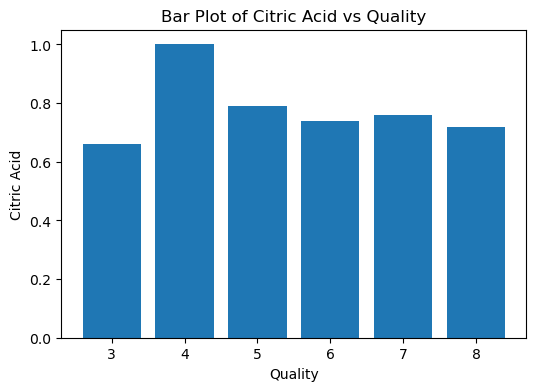

In [7]:
#See any trend in Citric Acid vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Bar Plot of Citric Acid vs Quality')
plt.show()

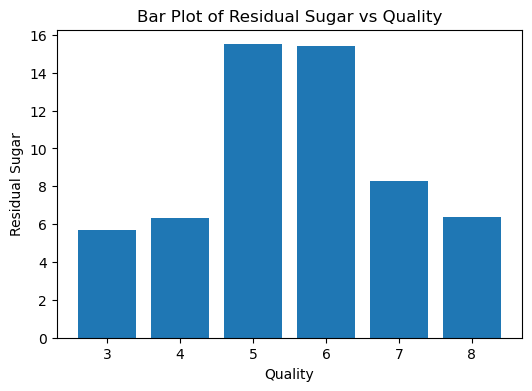

In [8]:
#See any trend in Residual Sugar vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Bar Plot of Residual Sugar vs Quality')
plt.show()

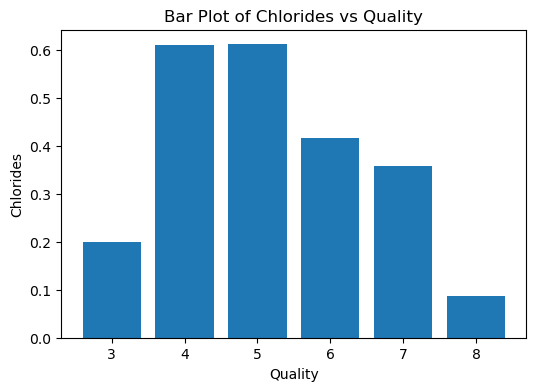

In [9]:
#See any trend in Chlorides vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.title('Bar Plot of Chlorides vs Quality')
plt.show()

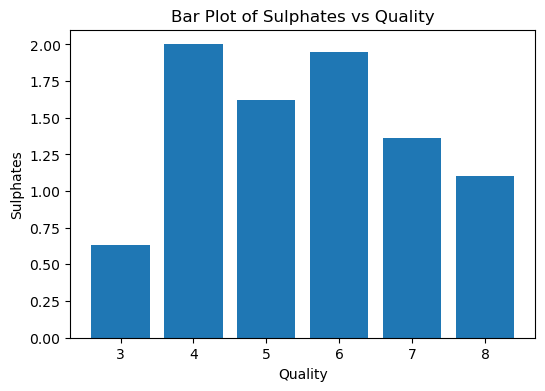

In [10]:
#See any trend in Sulphates vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['sulphates'])
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.title('Bar Plot of Sulphates vs Quality')
plt.show()

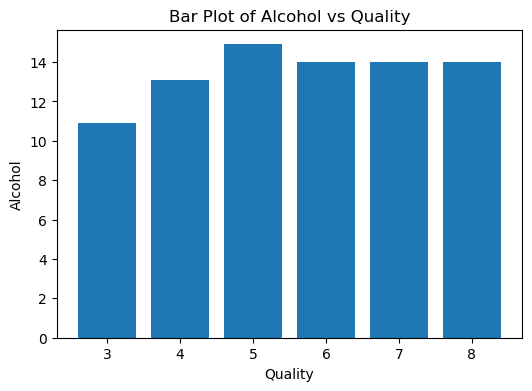

In [11]:
#See any trend in Alcohol vs Quality
fig = plt.figure(figsize=(6, 4))
plt.bar(wine_df['quality'], wine_df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Bar Plot of Alcohol vs Quality')
plt.show()

In [12]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.1, 8)
group_names = ['bad', 'good']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)

In [14]:
# Assuming 'quality' is already transformed into 'bad' and 'good' categories
label_quality = LabelEncoder()

In [15]:
# Fit and transform the 'quality' column
#bad becomes 0 and good becomes 1
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])

In [16]:
#Check counts on bad vs good to see if bins are sufficient
wine_df['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

In [17]:
#Now seperate the dataset as response variable and feature variabes
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']

In [18]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()

In [21]:
# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the parameters learned from the training data
X_test = scaler.transform(X_test)

In [22]:
#Use Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
prediction_rfc = rfc.predict(X_test)

In [24]:
#Classification Report
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       102
           1       0.81      0.78      0.80       127

    accuracy                           0.78       229
   macro avg       0.77      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



In [26]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_rfc))

[[79 23]
 [28 99]]


In [27]:
#Try Support Vector Model
from sklearn.svm import SVC

In [28]:
#Define model, train and predict
svc = SVC()
svc.fit(X_train, y_train)
prediction_svc = svc.predict(X_test)

In [29]:
#Classification report
print(classification_report(y_test, prediction_svc))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.79      0.80      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

